**Exploratory Data Analysis (EDA)**
**Steps:**
1. Reading dataset
2. Analyzing the data (Checking Missing values and Duplicates)
3. Exploratory Data Analysis
    3.1 Univariate Analysis
    3.2 Sector and Subsectorwise analysis
    3.3 Multivariate Analysis

In [429]:
# Importing Necessary Libraries
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import warnings as wr 
import plotly.graph_objects as go
wr.filterwarnings('ignore') 

**1. Reading dataset**

In [432]:
# Load the data from the downloaded CSV file
file_path = 'RealGDP1981_2023_processed.csv'
df = pd.read_csv(file_path)

print("Dimension of the dataset: ", df.shape[0],"Rows & ", df.shape[1], "Columns/ Indicators" )


Dimension of the dataset:  42 Rows &  57 Columns/ Indicators


**2. Analyzing the data (Checking Missing values, Data Types and Duplicates)**

In [435]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 57 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   Time                                              42 non-null     int64  
 1   Agriculture                                       42 non-null     float64
 2   CropProduction                                    42 non-null     float64
 3   Livestock                                         42 non-null     float64
 4   Forestry                                          42 non-null     float64
 5   Fishing                                           42 non-null     float64
 6   Industry                                          42 non-null     float64
 7   MiningAndQuarrying                                42 non-null     float64
 8   CrudePetroleumAndNaturalGas                       42 non-null     float64
 9   CoalMining             

In [437]:
# check for missing values column-wise
print(df.isnull().sum())

# Check for missing values in the entire dataframe
if df.isna().any().any():
    print("The dataset has missing values.")
else:
    print("The dataset has no missing values.")

# Check for duplicate values in the entire dataframe
if df.duplicated().any():
    print("The dataset has duplicate values.")
else:
    print("The dataset has no duplicate values.")

Time                                                0
Agriculture                                         0
CropProduction                                      0
Livestock                                           0
Forestry                                            0
Fishing                                             0
Industry                                            0
MiningAndQuarrying                                  0
CrudePetroleumAndNaturalGas                         0
CoalMining                                          0
MetalOres                                           0
QuarryingAndOtherMinerals                           0
Manufacturing                                       0
OilRefining                                         0
Cement                                              0
FoodBeverageAndTobacco                              0
TextileApparelAndFootwear                           0
WoodAndWoodProducts                                 0
PulpPaperAndPaperProducts   

In [439]:
# Select Agriculture and Industry related columns and GDP  
selected_columns = df.iloc[:, list(range(0, 29)) + [54]]


In [441]:
# Dataset’s central tendencies and spread are briefly summarized
selected_columns.describe()

,Time,Agriculture,CropProduction,Livestock,Forestry,Fishing,Industry,MiningAndQuarrying,CrudePetroleumAndNaturalGas,CoalMining,...,NonMetallicProducts,PlasticAndRubberProducts,ElectricalAndElectronics,BasicMetalIronAndSteel,MotorVehiclesAndAssembly,OtherManufacturing,ElectricityGasSteamAndAirCon,WaterSupplySewageWaste,Construction,GDP at 2010 Constant Basic Prices
count,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,...,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000
mean,2001.500000,8725.956190,7703.915952,722.849524,112.829286,186.361190,12263.735714,6633.942143,6583.173333,8.302857,...,97.981190,74.053333,12.487381,68.478095,54.169286,159.749762,119.686429,42.525000,1189.678571,38589.737857
std,12.267844,5866.176352,5401.478717,310.515685,41.892648,117.015359,2491.223264,1448.671721,1458.800995,7.429844,...,70.683586,79.921648,20.629321,56.529063,95.277128,81.132697,122.847301,43.978952,853.348639,20854.228395
min,1981.000000,2303.510000,1759.120000,341.410000,67.310000,40.650000,8255.760000,4096.990000,4052.980000,1.710000,...,54.500000,25.070000,1.800000,24.180000,6.410000,108.660000,5.120000,7.670000,335.760000,16048.310000
25%,1991.250000,3611.827500,2978.047500,459.607500,80.510000,94.097500,10251.905000,5516.707500,5473.310000,2.722500,...,56.792500,26.415000,2.482500,32.005000,22.112500,111.165000,7.125000,14.647500,520.340000,21569.830000
50%,2001.500000,6420.810000,5600.180000,583.790000,88.800000,148.465000,11739.410000,6494.135000,6473.645000,6.360000,...,57.445000,27.235000,4.580000,35.305000,26.435000,112.495000,96.075000,18.810000,769.595000,28701.905000
75%,2011.750000,14104.627500,12693.952500,994.440000,145.182500,286.062500,14711.722500,7589.775000,7567.720000,10.150000,...,108.805000,98.850000,6.472500,119.125000,36.872500,200.810000,245.685000,45.517500,1946.552500,59325.177500
max,2022.000000,19091.070000,17260.750000,1247.720000,196.360000,386.240000,16742.150000,9323.750000,9294.050000,27.500000,...,241.950000,231.940000,85.270000,169.680000,590.770000,367.840000,340.920000,170.450000,2680.220000,74639.470000


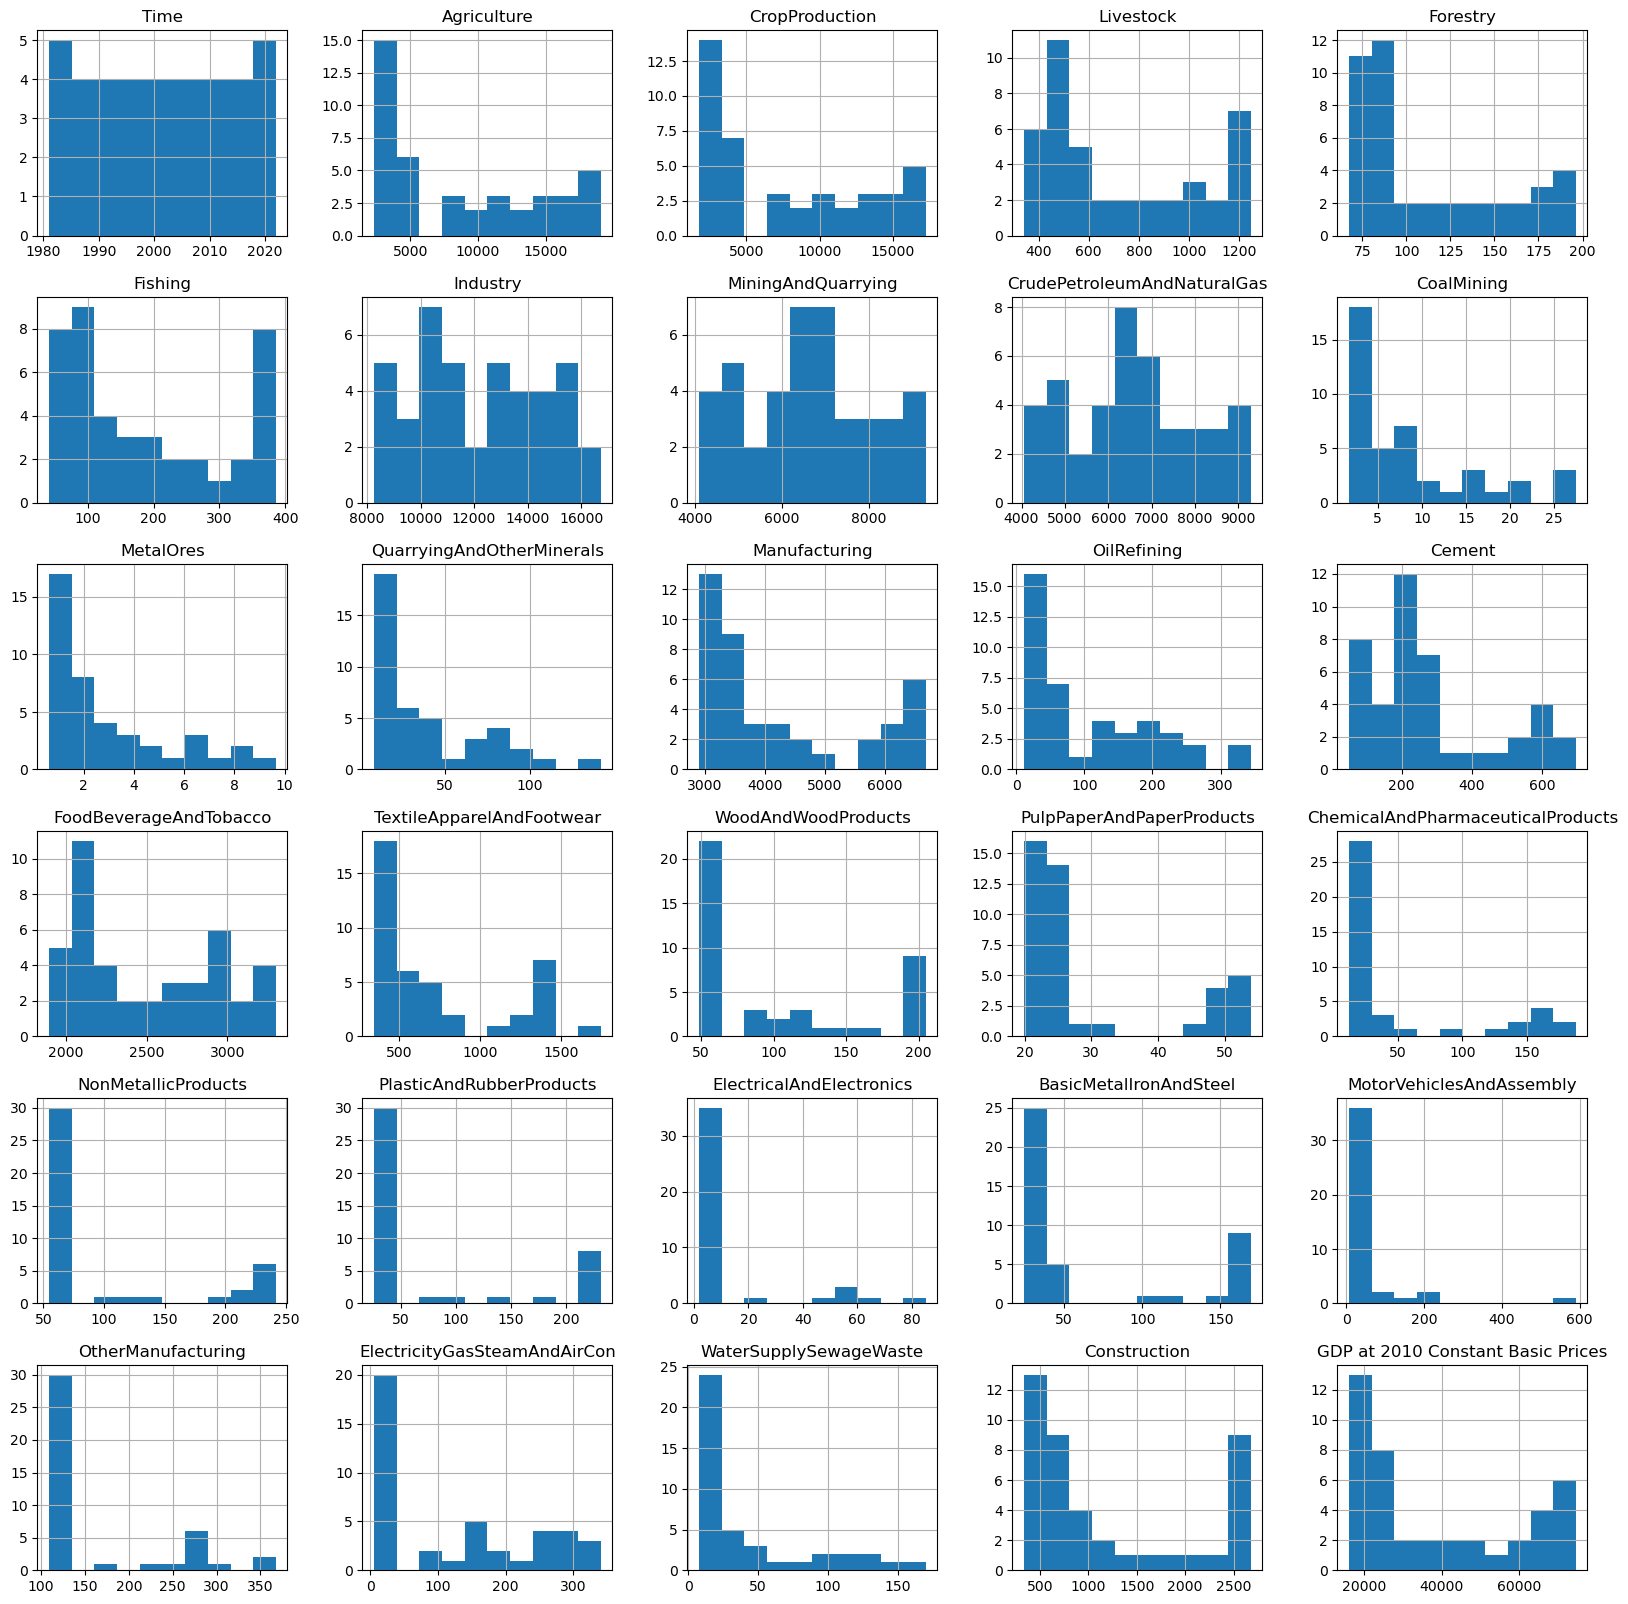

In [443]:
selected_columns.hist(figsize=(20, 20))
plt.show()

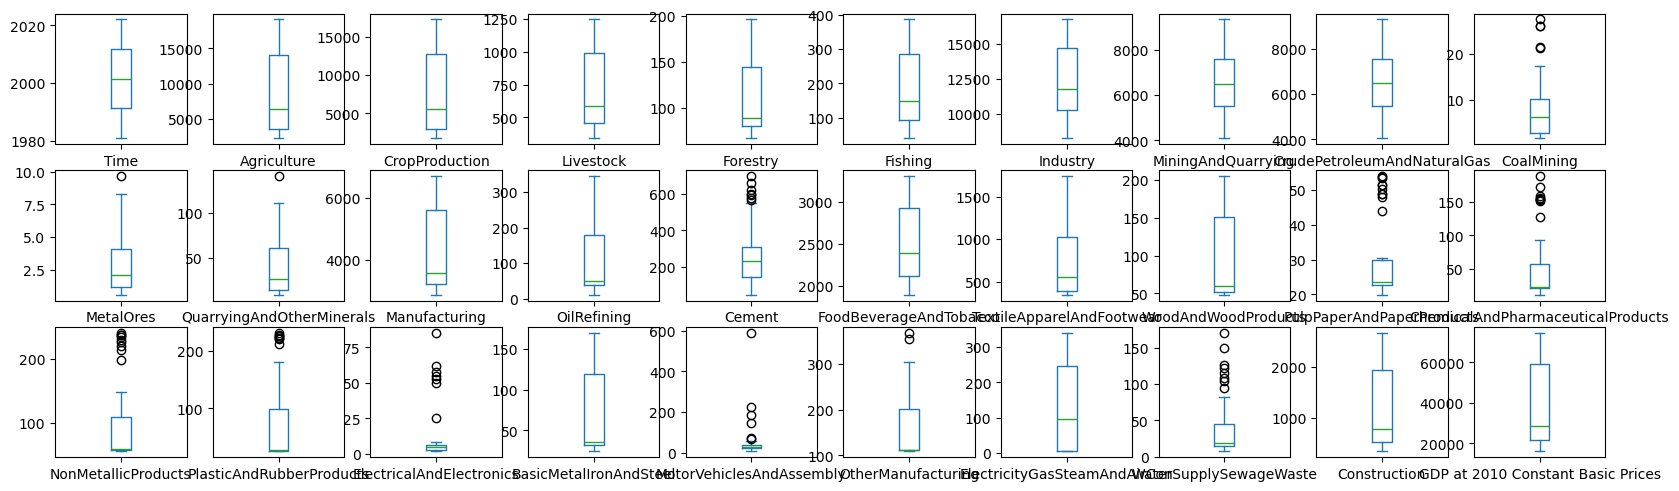

In [444]:
# Boxplots for Outliers
selected_columns.plot(kind='box', subplots=True, layout=(10, 10), figsize=(20, 20), sharex=False, sharey=False)
plt.show()

**3. Exploratory Data Analysis**

3.1 Univariate Analysis

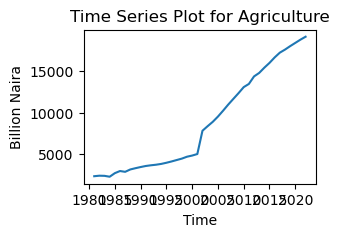

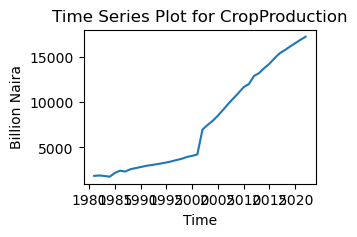

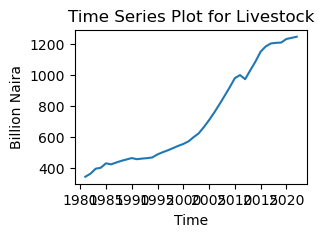

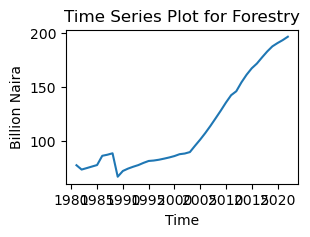

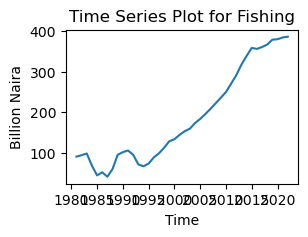

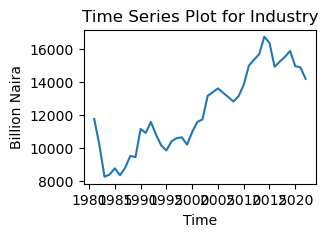

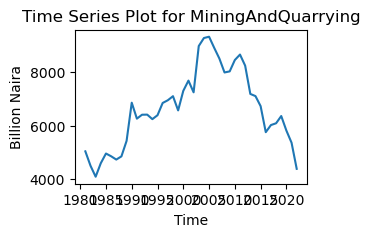

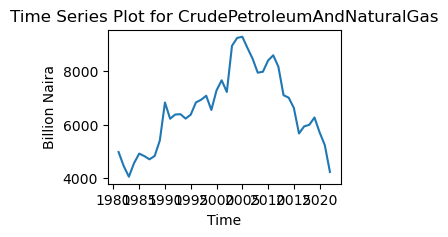

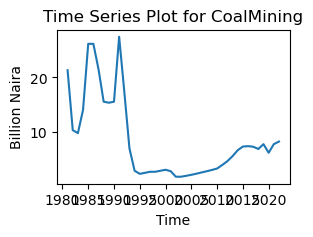

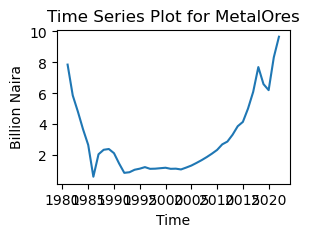

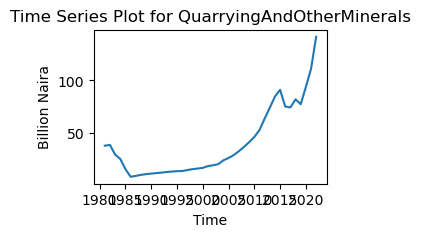

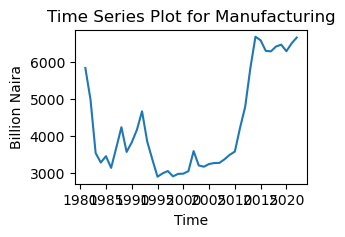

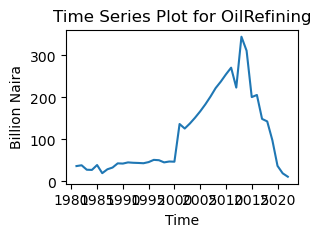

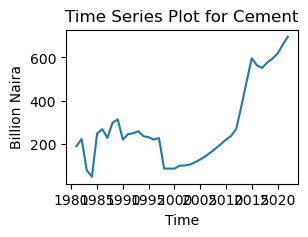

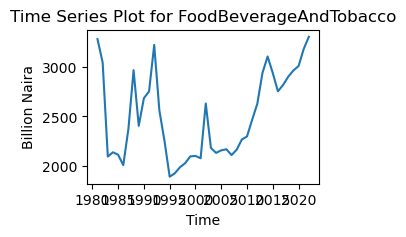

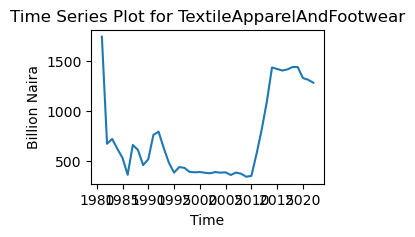

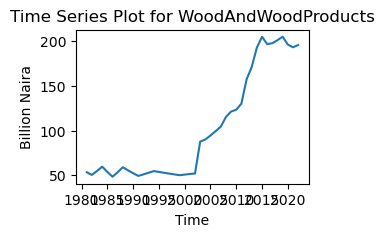

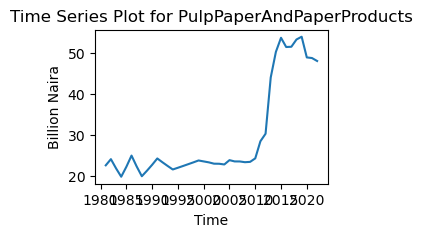

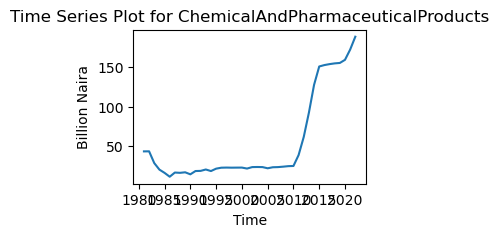

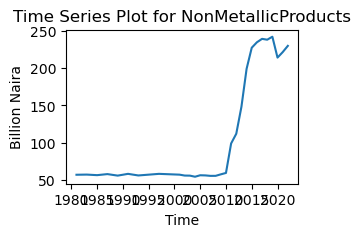

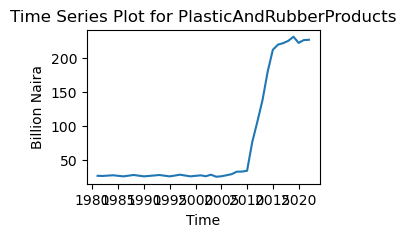

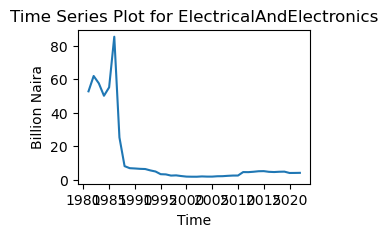

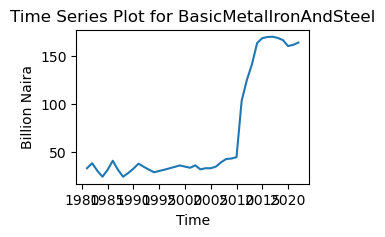

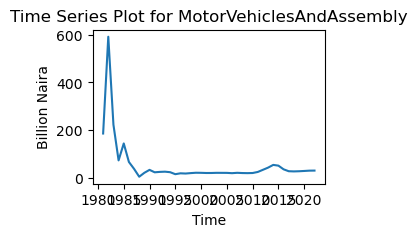

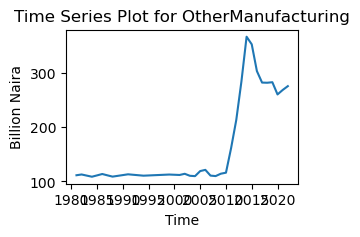

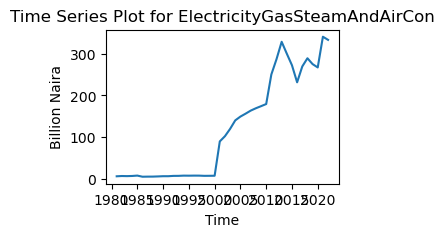

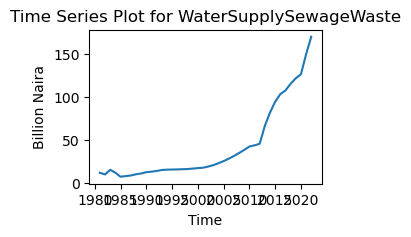

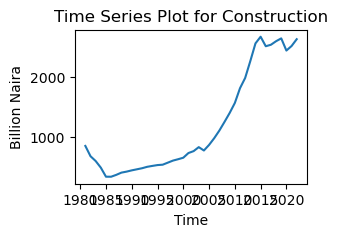

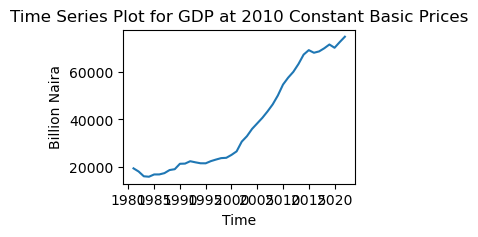

In [448]:
#column to list  and remove Time column 
df_cols = selected_columns.columns.tolist()
df_cols.remove('Time')

# Convert 'Time' column to datetime format as it was in int format
selected_columns['Time'] = pd.to_datetime(selected_columns['Time'], format='%Y')

# Create a line plot for each indicator against 'Time'
for col in df_cols:
    plt.figure(figsize=(3, 2))
    sns.lineplot(x='Time', y=col, data=selected_columns)
    plt.title(f'Time Series Plot for {col}')
    plt.xlabel('Time')
    plt.ylabel('Billion Naira')
    plt.show()

In [450]:
# Convert 'Time' column to datetime format as it was in int format
df['Time'] = pd.to_datetime(df['Time'], format='%Y')

In [452]:
# let's divide Indicators in groups based on GDP Breakup CBN Documents to gather more insights
# Compartmentalize data for easy usage 

def select_columns(df, indices):
    """
    Select columns from a DataFrame based on a list of indices as input to parameters (df & indices respectively).

    Returns: A new DataFrame with the selected columns.
    """
    # Convert 'Time' column to datetime format as it was in int format
    return pd.DataFrame(df.iloc[:, indices])
    
GDP_BreakUp_Sectors = select_columns(df, [0,1,6,29,54,55,56])
print('GDP BreakUp Sector-wise :',GDP_BreakUp_Sectors.columns.tolist(),"\n")

Agriculture_Sector = select_columns(df, [0,1,2,3,4,5])
print('Agriculture Sector :',Agriculture_Sector.columns.tolist(),"\n")


Industry_Sector= select_columns(df, [0,6,12,26,27,28])
print('Industry Sector :',Industry_Sector.columns.tolist(),"\n")


Industry_Mining_Subsector= select_columns(df, [0,7,8,9,10,11])
print('Industry Mining Subsector :',Industry_Mining_Subsector.columns.tolist(),"\n")

Industry_Manufacturing_Subsector= select_columns(df, [0,12,13,14,15,16,17,18,19,20,21,22,23,24,25])
print('Industry Manufacturing Subsector :',Industry_Manufacturing_Subsector.columns.tolist(),"\n")


GDP_BasicPrices = select_columns(df, [0,54])
print('GDP BasicPrices :',GDP_BasicPrices.columns.tolist(),"\n")



GDP BreakUp Sector-wise : ['Time', 'Agriculture', 'Industry', 'Services', 'GDP at 2010 Constant Basic Prices', 'NetTaxesOnProducts', 'GDP at 2010 Constant Market Prices'] 

Agriculture Sector : ['Time', 'Agriculture', 'CropProduction', 'Livestock', 'Forestry', 'Fishing'] 

Industry Sector : ['Time', 'Industry', 'Manufacturing', 'ElectricityGasSteamAndAirCon', 'WaterSupplySewageWaste', 'Construction'] 

Industry Mining Subsector : ['Time', 'MiningAndQuarrying', 'CrudePetroleumAndNaturalGas', 'CoalMining', 'MetalOres', 'QuarryingAndOtherMinerals'] 

Industry Manufacturing Subsector : ['Time', 'Manufacturing', 'OilRefining', 'Cement', 'FoodBeverageAndTobacco', 'TextileApparelAndFootwear', 'WoodAndWoodProducts', 'PulpPaperAndPaperProducts', 'ChemicalAndPharmaceuticalProducts', 'NonMetallicProducts', 'PlasticAndRubberProducts', 'ElectricalAndElectronics', 'BasicMetalIronAndSteel', 'MotorVehiclesAndAssembly', 'OtherManufacturing'] 

GDP BasicPrices : ['Time', 'GDP at 2010 Constant Basic Pric

In [454]:
#Correlation Analysis Agriculture & Industry Sector 
# Calculating the correlation matrix
df= GDP_BreakUp_Sectors 
df_dropped = df.drop('Time', axis=1) 

correlation_matrix = df_dropped.corr()
print("Correlation Matrix:")
print(correlation_matrix)


Correlation Matrix:
                                    Agriculture  Industry  Services  \
Agriculture                            1.000000  0.920686  0.987756   
Industry                               0.920686  1.000000  0.907071   
Services                               0.987756  0.907071  1.000000   
GDP at 2010 Constant Basic Prices      0.994530  0.932417  0.996937   
NetTaxesOnProducts                     0.960995  0.875178  0.971402   
GDP at 2010 Constant Market Prices     0.994501  0.932060  0.997012   

                                    GDP at 2010 Constant Basic Prices  \
Agriculture                                                  0.994530   
Industry                                                     0.932417   
Services                                                     0.996937   
GDP at 2010 Constant Basic Prices                            1.000000   
NetTaxesOnProducts                                           0.968134   
GDP at 2010 Constant Market Prices          

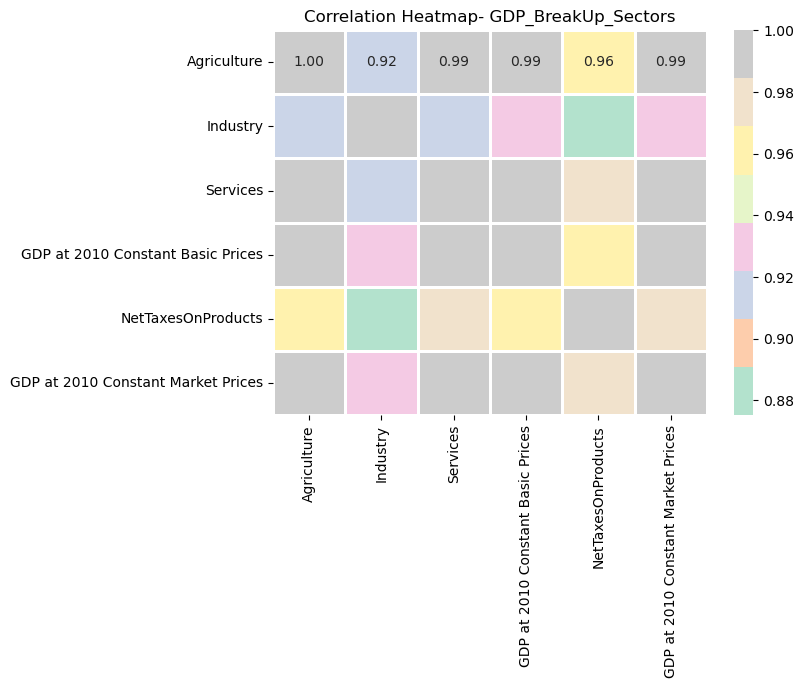

In [456]:
plt.figure(figsize=(7, 5)) 
  
# Using Seaborn to create a heatmap 
sns.heatmap(df_dropped.corr(), annot=True, fmt='.2f', cmap='Pastel2', linewidths=2) 
  
plt.title('Correlation Heatmap- GDP_BreakUp_Sectors') 
plt.show() 

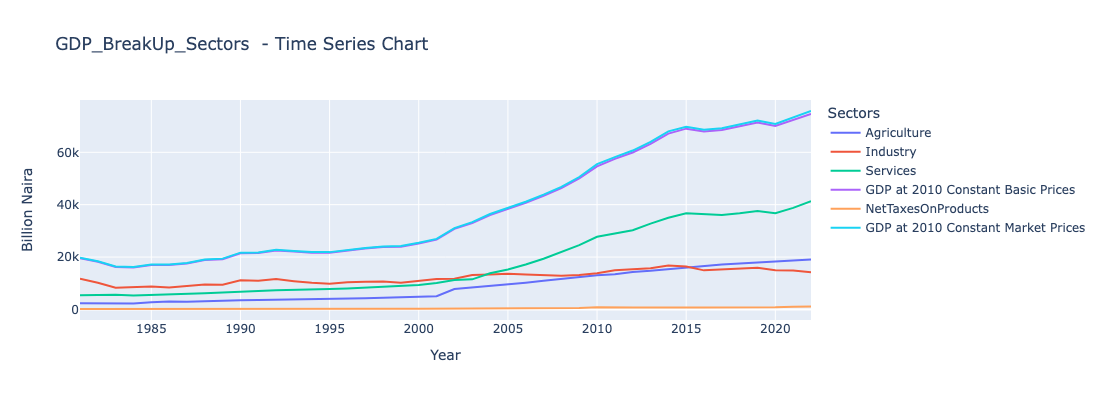

In [458]:


# Setting the 'Date' column as the index
data_frame = GDP_BreakUp_Sectors 
data_frame.set_index('Time', inplace=True)

# Creating the plotly figure
fig = go.Figure()

# Adding traces for each column
for column in data_frame.columns:
    fig.add_trace(go.Scatter(x=data_frame.index, y=data_frame[column], mode='lines', name=column))

# Adding labels and title
fig.update_layout(
    title='GDP_BreakUp_Sectors  - Time Series Chart',
    xaxis_title='Year',
    yaxis_title='Billion Naira',
    legend_title='Sectors',
    autosize=False,
    width=800,
    height=400
)

# Displaying the chart
fig.show()


In [460]:
#Correlation Analysis among Agriculture Sector 
# Calculating the correlation matrix
df= Agriculture_Sector
df_dropped = df.drop('Time', axis=1) 

correlation_matrix = df_dropped.corr()
print("Correlation Matrix:")
print(correlation_matrix)

Correlation Matrix:
                Agriculture  CropProduction  Livestock  Forestry   Fishing
Agriculture        1.000000        0.999958   0.994300  0.973754  0.986065
CropProduction     0.999958        1.000000   0.993376  0.972298  0.985001
Livestock          0.994300        0.993376   1.000000  0.981485  0.986249
Forestry           0.973754        0.972298   0.981485  1.000000  0.971728
Fishing            0.986065        0.985001   0.986249  0.971728  1.000000


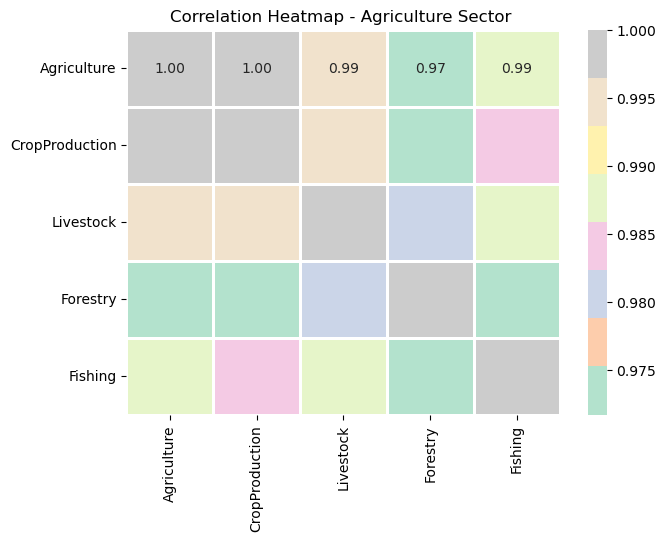

In [462]:
plt.figure(figsize=(7, 5)) 
  
# Using Seaborn to create a heatmap 
sns.heatmap(df_dropped.corr(), annot=True, fmt='.2f', cmap='Pastel2', linewidths=2) 
  
plt.title('Correlation Heatmap - Agriculture Sector ') 
plt.show() 

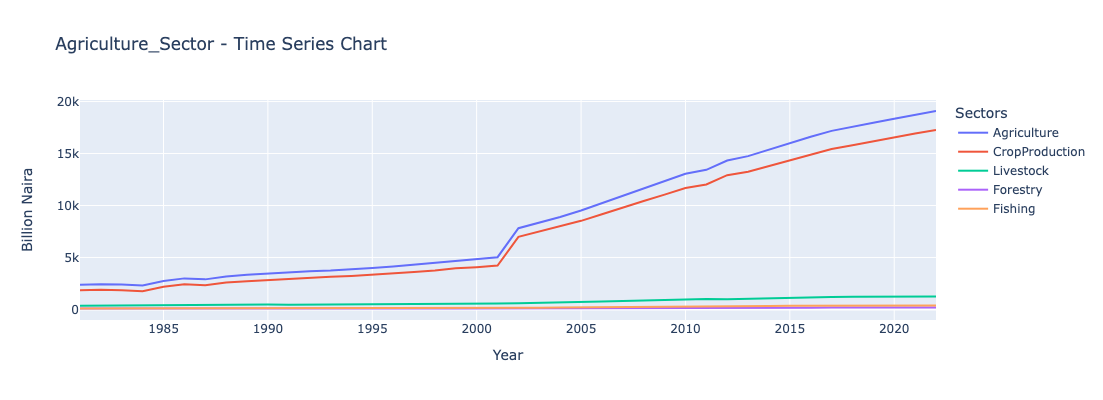

In [464]:
# Agriculture Sector 

# Setting the 'Date' column as the index
data_frame = Agriculture_Sector
data_frame.set_index('Time', inplace=True)

# Creating the plotly figure
fig = go.Figure()

# Adding traces for each column
for column in data_frame.columns:
    fig.add_trace(go.Scatter(x=data_frame.index, y=data_frame[column], mode='lines', name=column))

# Adding labels and title
fig.update_layout(
    title='Agriculture_Sector - Time Series Chart',
    xaxis_title='Year',
    yaxis_title='Billion Naira',
    legend_title='Sectors',
    autosize=False,
    width=800,
    height=400
)

# Displaying the chart
fig.show()
    


In [466]:
#Correlation Analysis among Industry Sector 
# Calculating the correlation matrix
df= Industry_Sector
df_dropped = df.drop('Time', axis=1) 

correlation_matrix = df_dropped.corr()
print("Correlation Matrix:")
print(correlation_matrix)

Correlation Matrix:
                              Industry  Manufacturing  \
Industry                      1.000000       0.696766   
Manufacturing                 0.696766       1.000000   
ElectricityGasSteamAndAirCon  0.928115       0.717624   
WaterSupplySewageWaste        0.754680       0.836991   
Construction                  0.899339       0.849110   

                              ElectricityGasSteamAndAirCon  \
Industry                                          0.928115   
Manufacturing                                     0.717624   
ElectricityGasSteamAndAirCon                      1.000000   
WaterSupplySewageWaste                            0.859153   
Construction                                      0.947071   

                              WaterSupplySewageWaste  Construction  
Industry                                    0.754680      0.899339  
Manufacturing                               0.836991      0.849110  
ElectricityGasSteamAndAirCon                0.859153     

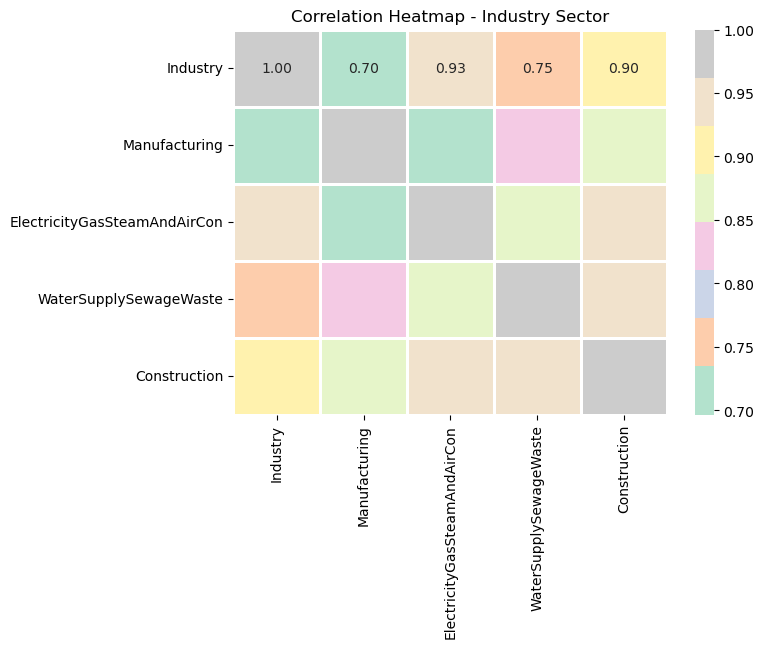

In [468]:
plt.figure(figsize=(7, 5)) 
  
# Using Seaborn to create a heatmap 
sns.heatmap(df_dropped.corr(), annot=True, fmt='.2f', cmap='Pastel2', linewidths=2) 
  
plt.title('Correlation Heatmap - Industry Sector') 
plt.show() 

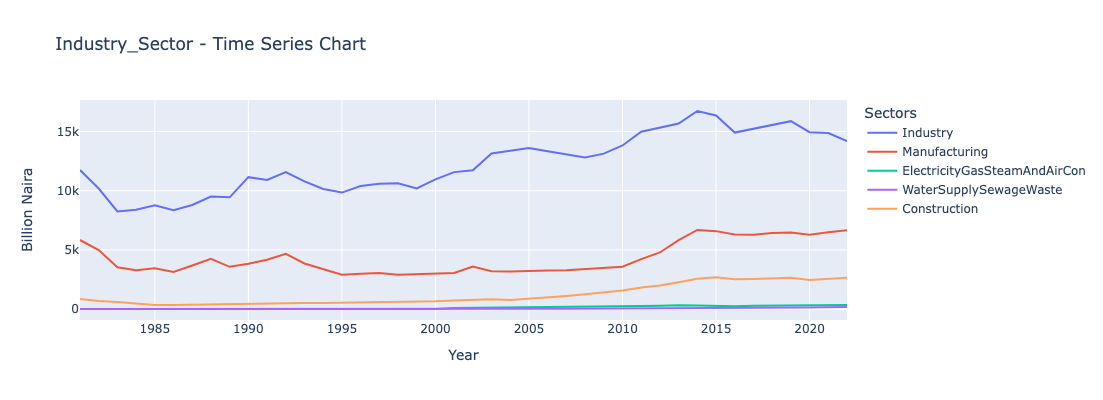

In [470]:
# Industry Sector 
# Setting the 'Date' column as the index
data_frame = Industry_Sector
data_frame.set_index('Time', inplace=True)

# Creating the plotly figure
fig = go.Figure()

# Adding traces for each column
for column in data_frame.columns:
    fig.add_trace(go.Scatter(x=data_frame.index, y=data_frame[column], mode='lines', name=column))

# Adding labels and title
fig.update_layout(
    title='Industry_Sector - Time Series Chart',
    xaxis_title='Year',
    yaxis_title='Billion Naira',
    legend_title='Sectors',
    autosize=False,
    width=800,
    height=400
)

# Displaying the chart
fig.show()

In [472]:
#Correlation Analysis among Industry Mining Subsector
# Calculating the correlation matrix
df= Industry_Mining_Subsector
df_dropped = df.drop('Time', axis=1) 

correlation_matrix = df_dropped.corr()
print("Correlation Matrix:")
print(correlation_matrix)

Correlation Matrix:
                             MiningAndQuarrying  CrudePetroleumAndNaturalGas  \
MiningAndQuarrying                     1.000000                     0.999744   
CrudePetroleumAndNaturalGas            0.999744                     1.000000   
CoalMining                            -0.636392                    -0.632865   
MetalOres                             -0.491186                    -0.508490   
QuarryingAndOtherMinerals             -0.116906                    -0.139016   

                             CoalMining  MetalOres  QuarryingAndOtherMinerals  
MiningAndQuarrying            -0.636392  -0.491186                  -0.116906  
CrudePetroleumAndNaturalGas   -0.632865  -0.508490                  -0.139016  
CoalMining                     1.000000   0.120098                  -0.194998  
MetalOres                      0.120098   1.000000                   0.817917  
QuarryingAndOtherMinerals     -0.194998   0.817917                   1.000000  


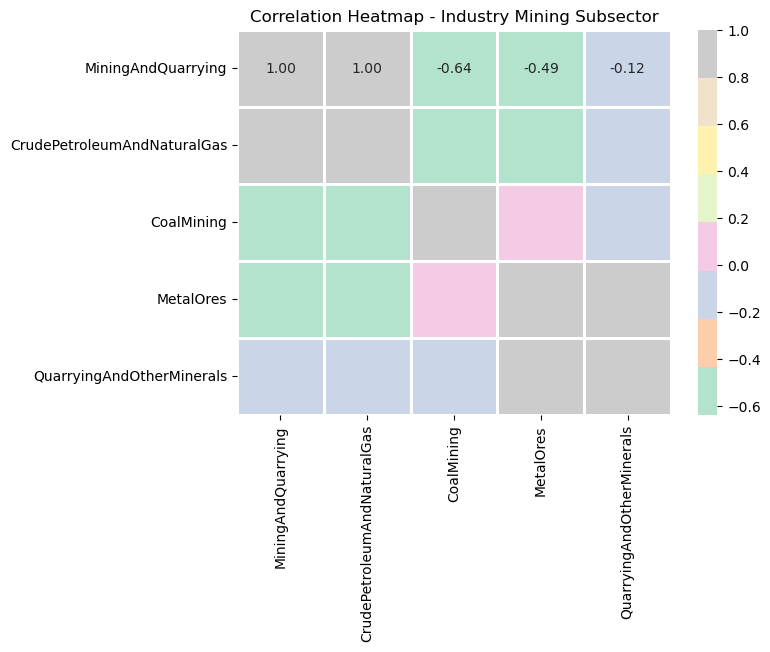

In [474]:
plt.figure(figsize=(7, 5)) 
  
# Using Seaborn to create a heatmap 
sns.heatmap(df_dropped.corr(), annot=True, fmt='.2f', cmap='Pastel2', linewidths=2) 
  
plt.title('Correlation Heatmap - Industry Mining Subsector') 
plt.show() 

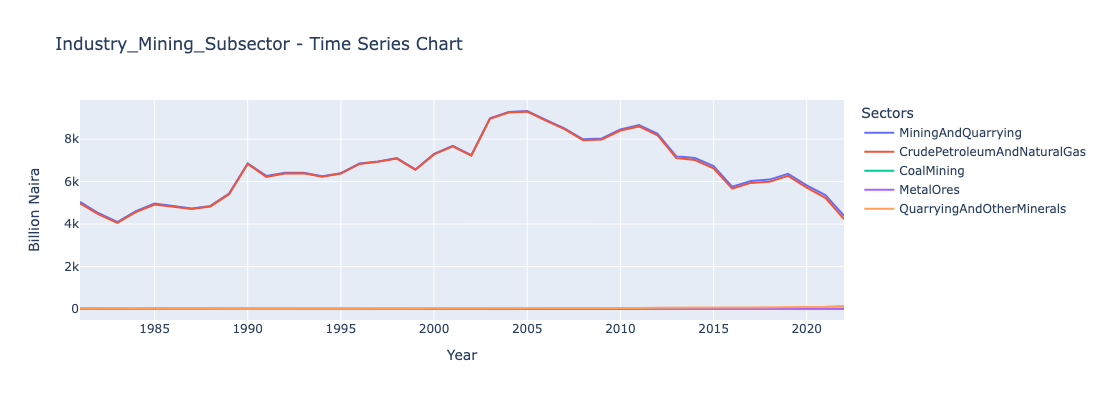

In [476]:
# Industry Mining Subsector 
# Setting the 'Date' column as the index
data_frame = Industry_Mining_Subsector
data_frame.set_index('Time', inplace=True)

# Creating the plotly figure
fig = go.Figure()

# Adding traces for each column
for column in data_frame.columns:
    fig.add_trace(go.Scatter(x=data_frame.index, y=data_frame[column], mode='lines', name=column))

# Adding labels and title
fig.update_layout(
    title='Industry_Mining_Subsector - Time Series Chart',
    xaxis_title='Year',
    yaxis_title='Billion Naira',
    legend_title='Sectors',
    autosize=False,
    width=800,
    height=400
)

# Displaying the chart
fig.show()  

In [478]:
#Correlation Analysis among Industry Manufacturing Subsector
# Calculating the correlation matrix
df= Industry_Manufacturing_Subsector
df_dropped = df.drop('Time', axis=1) 

correlation_matrix = df_dropped.corr()
print("Correlation Matrix:")
print(correlation_matrix)

Correlation Matrix:
                                   Manufacturing  OilRefining    Cement  \
Manufacturing                           1.000000     0.199696  0.888286   
OilRefining                             0.199696     1.000000  0.085220   
Cement                                  0.888286     0.085220  1.000000   
FoodBeverageAndTobacco                  0.881014     0.042433  0.699471   
TextileApparelAndFootwear               0.951768     0.086921  0.803892   
WoodAndWoodProducts                     0.821950     0.518917  0.831294   
PulpPaperAndPaperProducts               0.899302     0.303159  0.909582   
ChemicalAndPharmaceuticalProducts       0.913368     0.178198  0.924890   
NonMetallicProducts                     0.899859     0.231543  0.927102   
PlasticAndRubberProducts                0.900706     0.235489  0.930478   
ElectricalAndElectronics               -0.068229    -0.384229 -0.176551   
BasicMetalIronAndSteel                  0.896852     0.366174  0.894976   
Motor

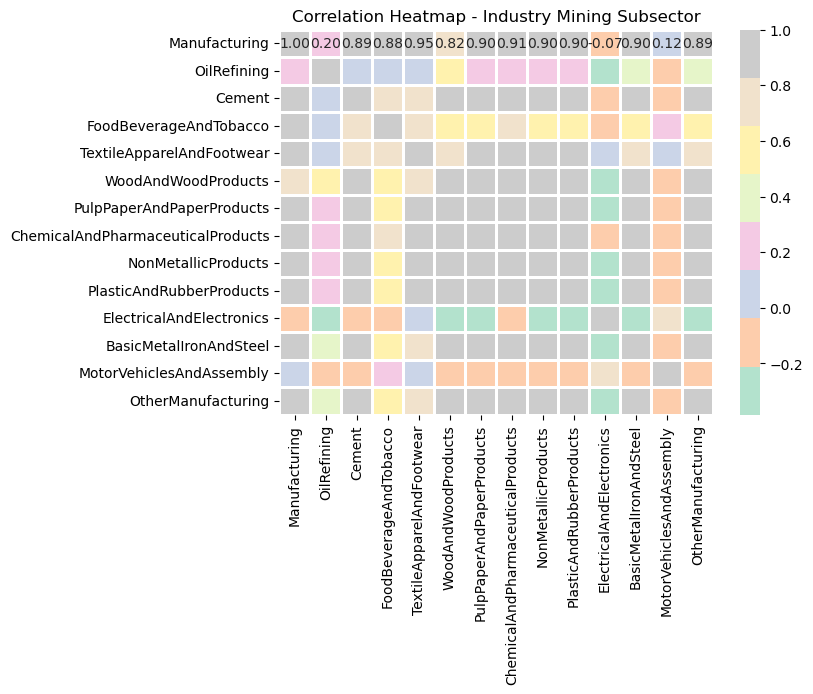

In [480]:
plt.figure(figsize=(7, 5)) 
  
# Using Seaborn to create a heatmap 
sns.heatmap(df_dropped.corr(), annot=True, fmt='.2f', cmap='Pastel2', linewidths=2) 
  
plt.title('Correlation Heatmap - Industry Manufacturing Subsector') 
plt.show() 

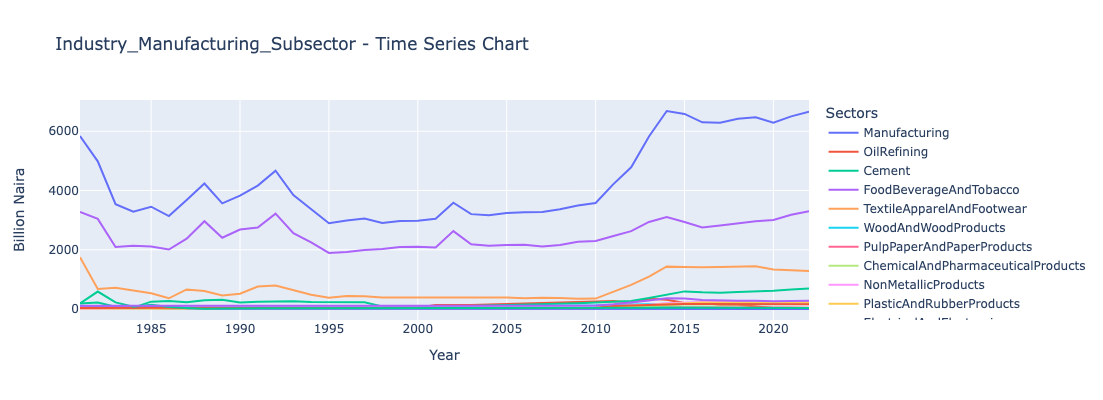

In [482]:
# Industry Manufacturing Subsector 
# Setting the 'Date' column as the index
data_frame = Industry_Manufacturing_Subsector
data_frame.set_index('Time', inplace=True)

# Creating the plotly figure
fig = go.Figure()

# Adding traces for each column
for column in data_frame.columns:
    fig.add_trace(go.Scatter(x=data_frame.index, y=data_frame[column], mode='lines', name=column))

# Adding labels and title
fig.update_layout(
    title='Industry_Manufacturing_Subsector - Time Series Chart',
    xaxis_title='Year',
    yaxis_title='Billion Naira',
    legend_title='Sectors',
    autosize=False,
    width=800,
    height=400
)

# Displaying the chart
fig.show()  